<a href="https://colab.research.google.com/github/PerawitDeawpanich/CN334-Template-Perawit/blob/master/SF251_In_Class_Exercise_4(easy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Exercise 4

Once done, upload to MS Teams

## Pokemon Dataset Part 4

Data from https://www.kaggle.com/datasets/cristobalmitchell/pokedex

In [ ]:
!wget https://raw.githubusercontent.com/yongsa-nut/SF251_67_2/refs/heads/main/data/pokemon.csv

In [ ]:
import pandas as pd
from plotnine import *

In [ ]:
#Load the data
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

In [ ]:
pokemon.columns

**Q1**: EDA 1: Plot the number of pokemon in each gen. You can quickly verify that the data is right by checking the numbers on the internet.

In [ ]:
gen_count = pokemon["gen"].value_counts().reset_index()

**Q2**: Adding count numbers to the previous plot

1.  First create a new dataframe of the number of pokemon in each gen. You can do this using `value_counts` (with `reset_index`) or `groupby`
2.  Use this new dataframe with `geom_text`. Think about how to position the text better. To make it more readable, you can also change the color of the text using `color = 'red'` inside `aes`




In [43]:
gen_count = gen_count = pokemon["gen"].value_counts().reset_index()
gen_count

,gen,count
0,V,156
1,I,151
2,III,135
3,IV,107
4,II,100
5,VIII,89
6,VII,88
7,VI,72


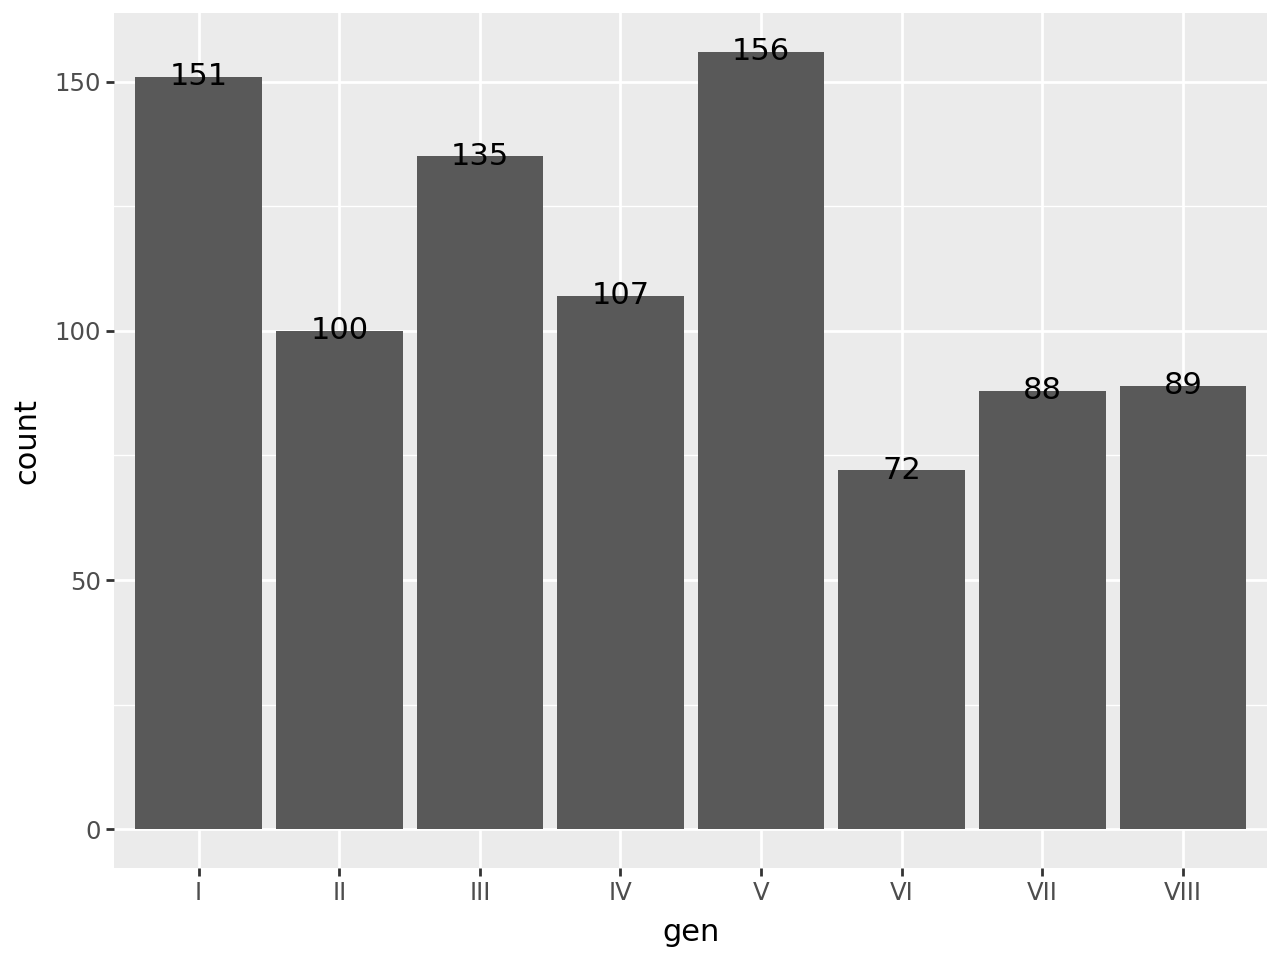

In [ ]:
# Example

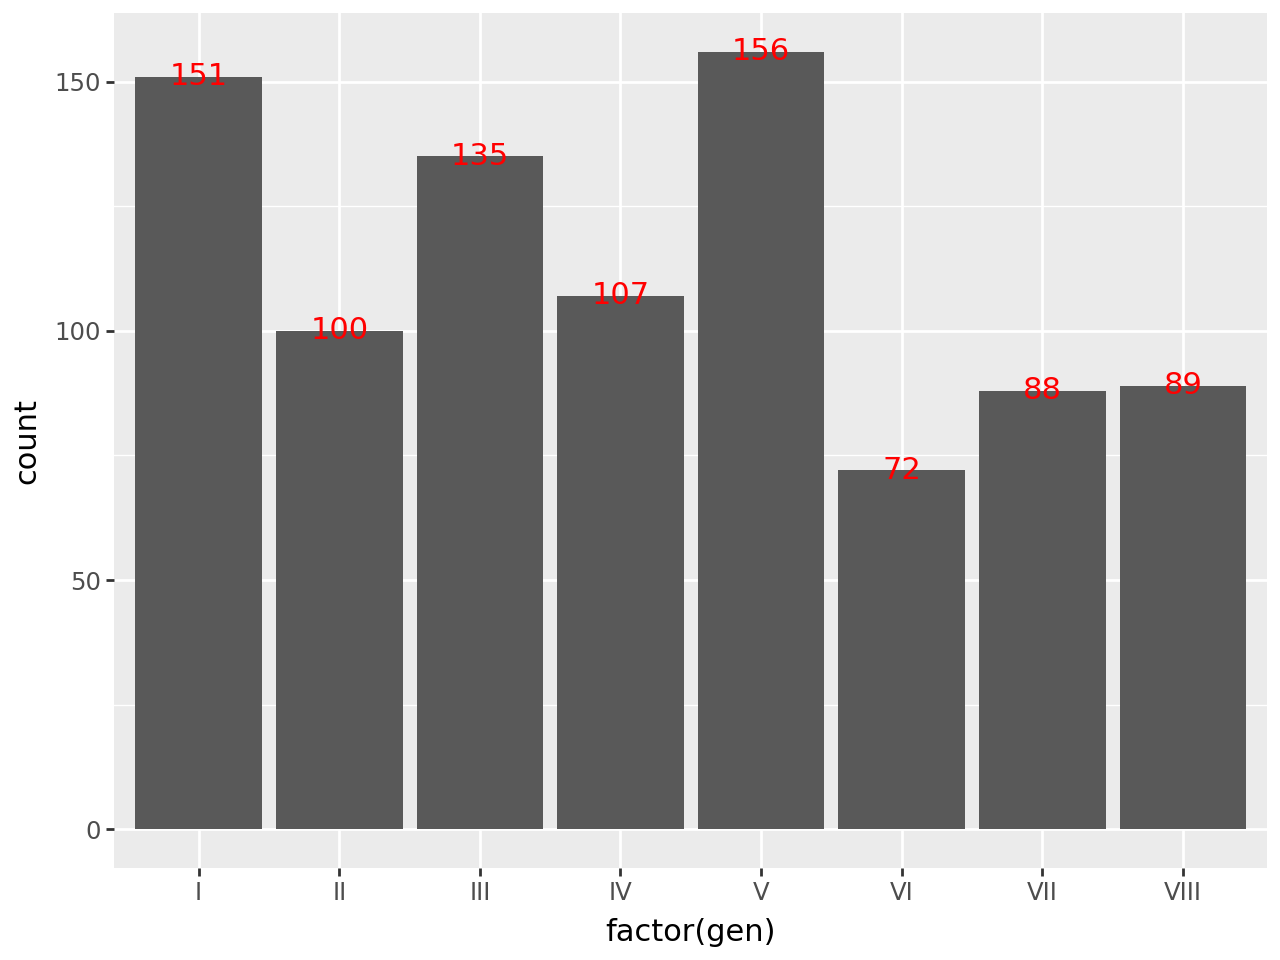

In [35]:
(
    ggplot(gen_count, aes(x="factor(gen)", y="count"))
    + geom_bar(stat="identity")
    + geom_text(aes(label="count"),color = 'red')
)

**Q3**: EDA 2: Plot the total stats vs. rarity.
- Rarity: is the rarity of pokemon: `normal`, `sublegendary`, `mythical`, and `legendary`. (Same as the previous exercise)
- Total stats: The sum of all stats (`hp`, `attack`, `defense`, `sp_attack`, `sp_defense`, `speed`).

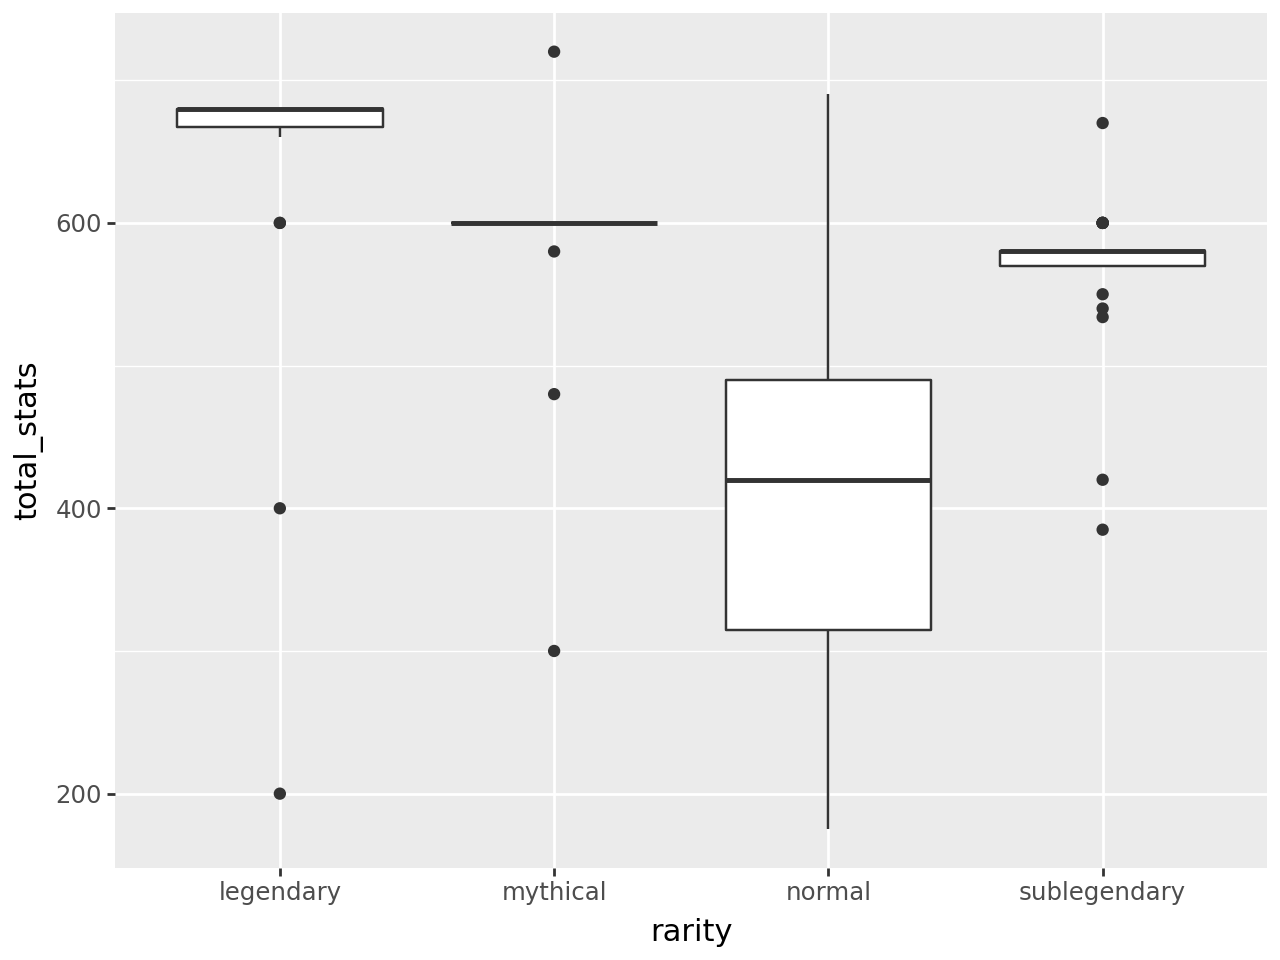

In [ ]:
# Example

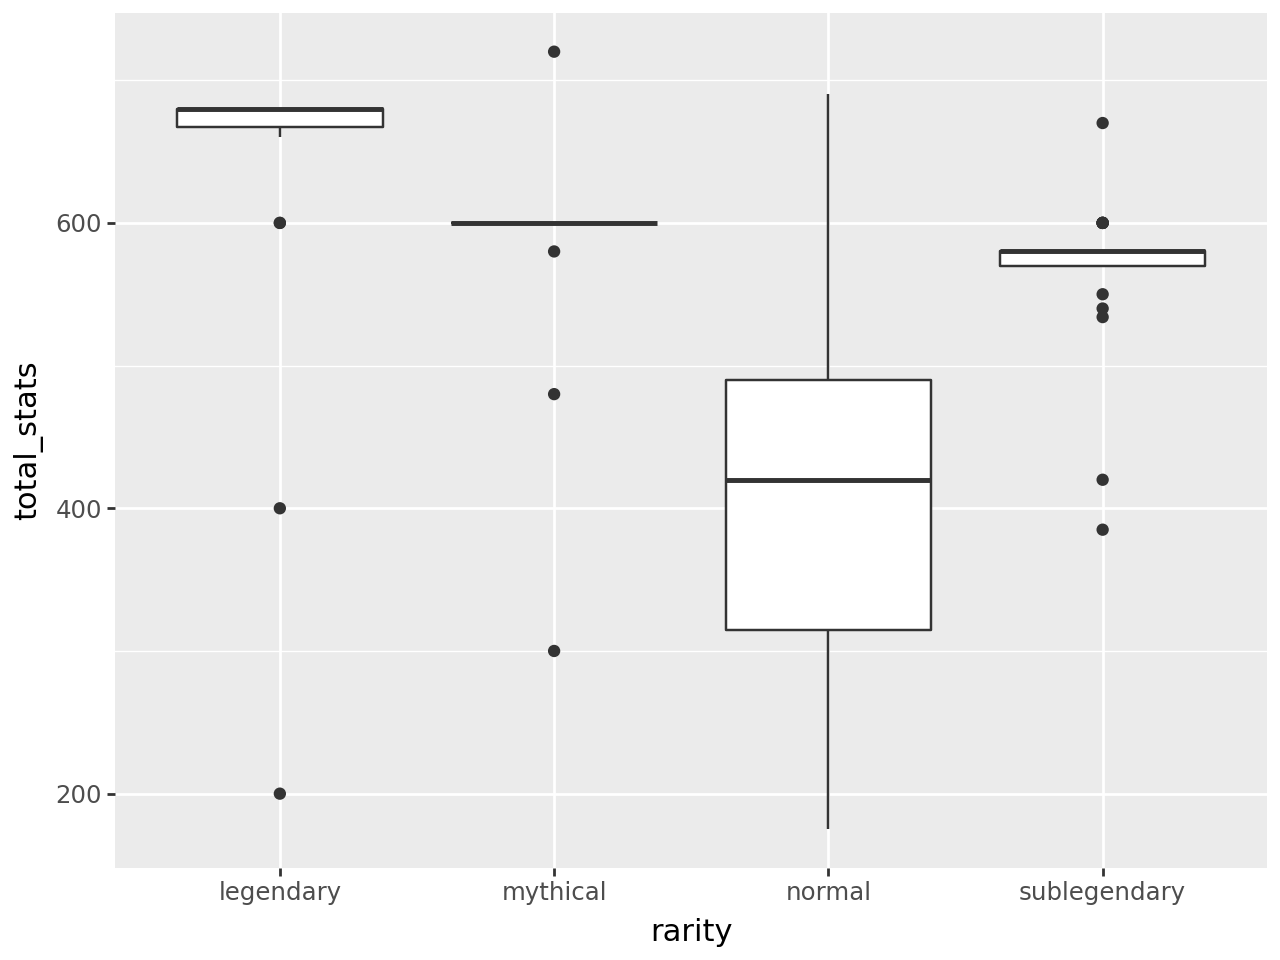

In [44]:
pokemon["total_stats"] = (
    pokemon["hp"]
    + pokemon["attack"]
    + pokemon["defense"]
    + pokemon["sp_attack"]
    + pokemon["sp_defense"]
    + pokemon["speed"]
)
#pokemon["rarity"] = "normal"
#pokemon.loc[pokemon["is_sublegendary"] == True, "rarity"] = "sublegendary"
#pokemon.loc[pokemon["is_mythical"] == True, "rarity"] = "mythical"
#pokemon.loc[pokemon["is_legendary"] == True, "rarity"] = "legendary"
pokemon["rarity"] = pd.Categorical(
    pokemon["rarity"],
    categories=["legendary", "mythical", "normal", "sublegendary"],
    ordered=True
)
g_q3 = (
    ggplot(pokemon, aes(x="rarity", y="total_stats"))
    + geom_boxplot()
)


g_q3

**Q4**: Total stats x gen x primary type:

Plot a boxplot showing the total stats x 2 Gen (1 and 8) x 5 Primarty type ('fire', 'grass', 'water', 'electric', 'bug').

Make sure this graph is easy to compare between gen 1 and 8.

/tmp/ipython-input-831940312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


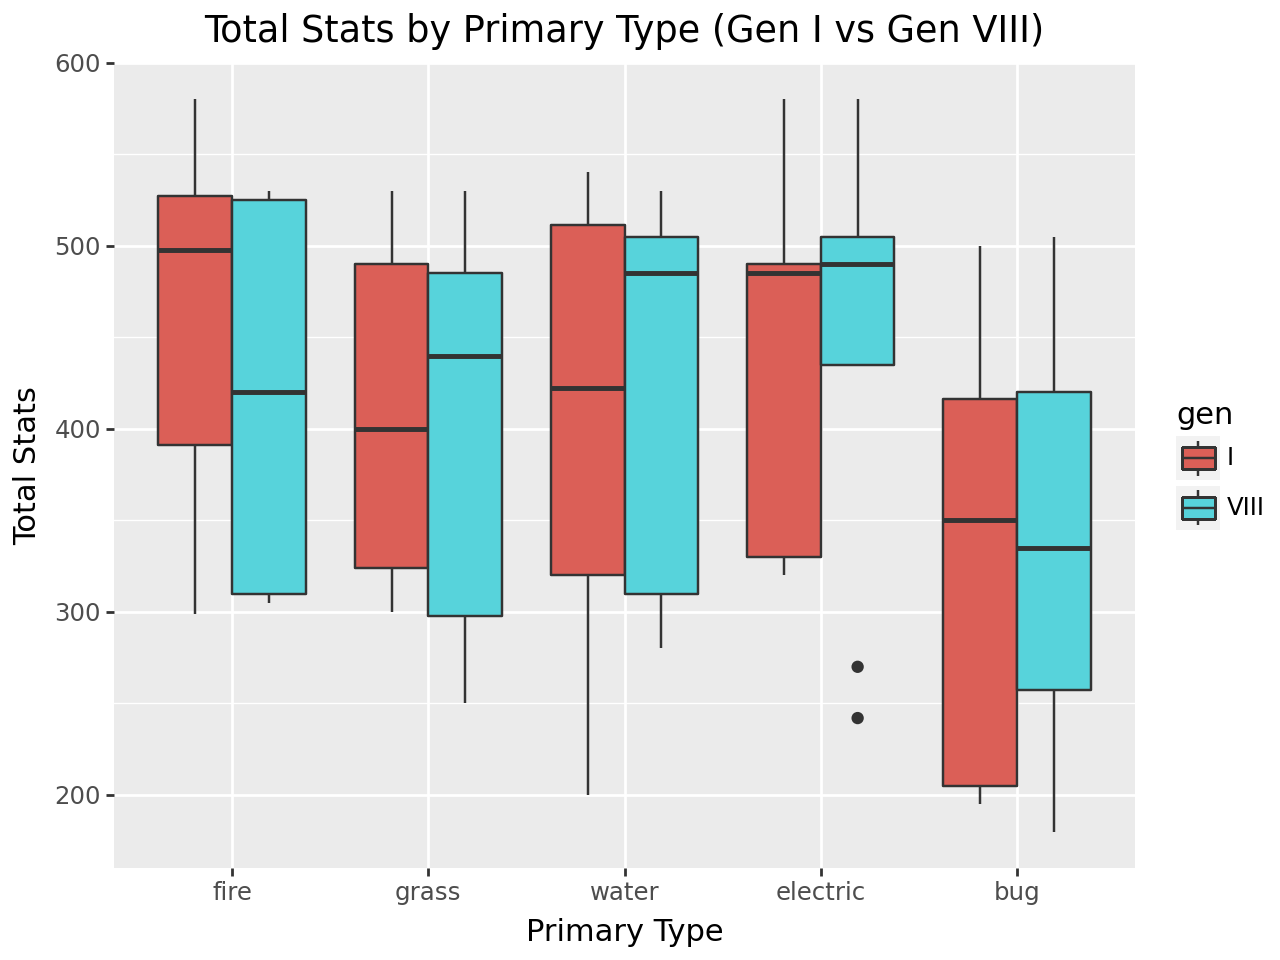

In [53]:
types_keep = ["fire", "grass", "water", "electric", "bug"]

pokemon_sub = pokemon[(pokemon["gen"].isin(["I", "VIII"])) & (pokemon["primary_type"].isin(types_keep))]

pokemon_sub["primary_type"] = pd.Categorical(pokemon_sub["primary_type"], categories=types_keep, ordered=True)

g_q4 = (
    ggplot(pokemon_sub, aes(x="primary_type", y="total_stats", fill="gen"))
    + geom_boxplot(position="dodge")
    + labs(
        title="Total Stats by Primary Type (Gen I vs Gen VIII)",
        x="Primary Type",
        y="Total Stats"
    )
)

g_q4

**Q5**: EDA 3: Plot the distribution of all primary types (`barplot`) for every gen.
- Use `facet_wrap` with `gen`: `facet_wrap("gen")`. You can also change number of rows (`nrow`) and columns (`ncol`). [Documentation](https://plotnine.org/reference/facet_wrap.html)
- For better readability, you can rotate a_xis 90 degree using `theme(axis_text_x = element_text(angle = 90))` You can also make the graph bigger.
- If you know about pokemon, look at gen I subplot, does it make sense to you?

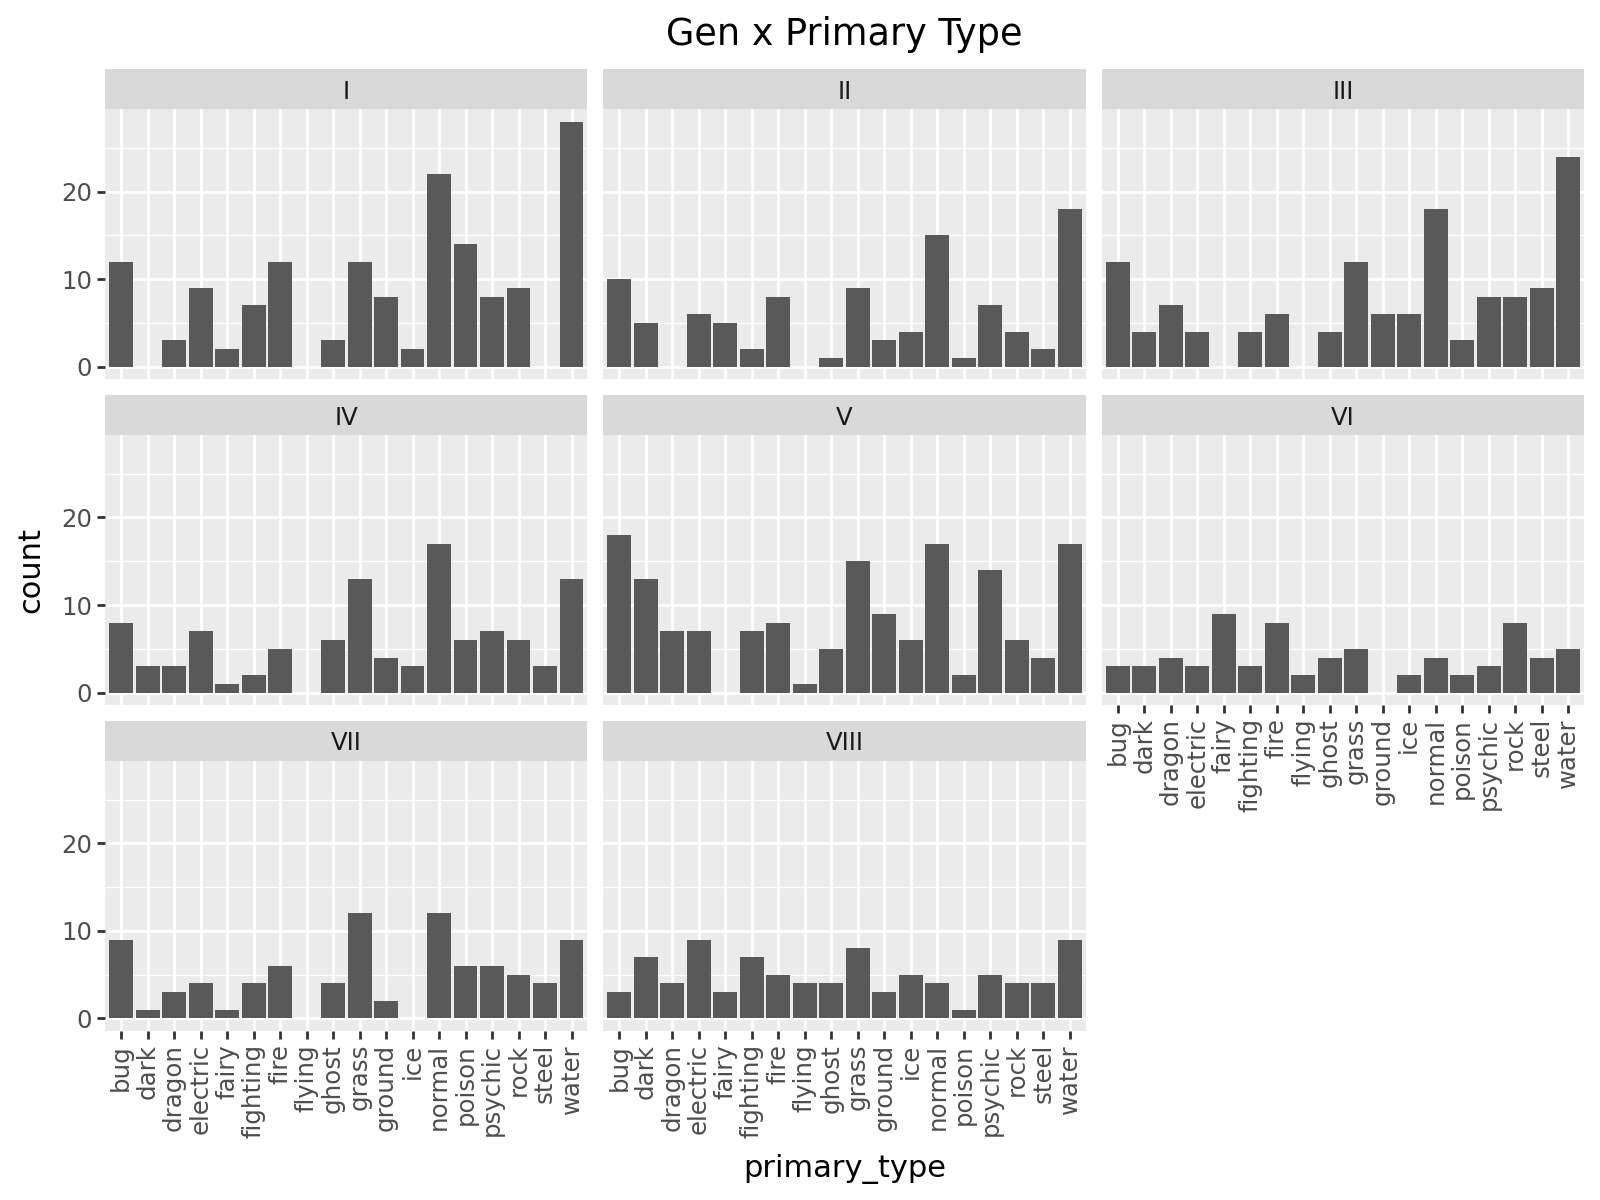

In [ ]:
# Example

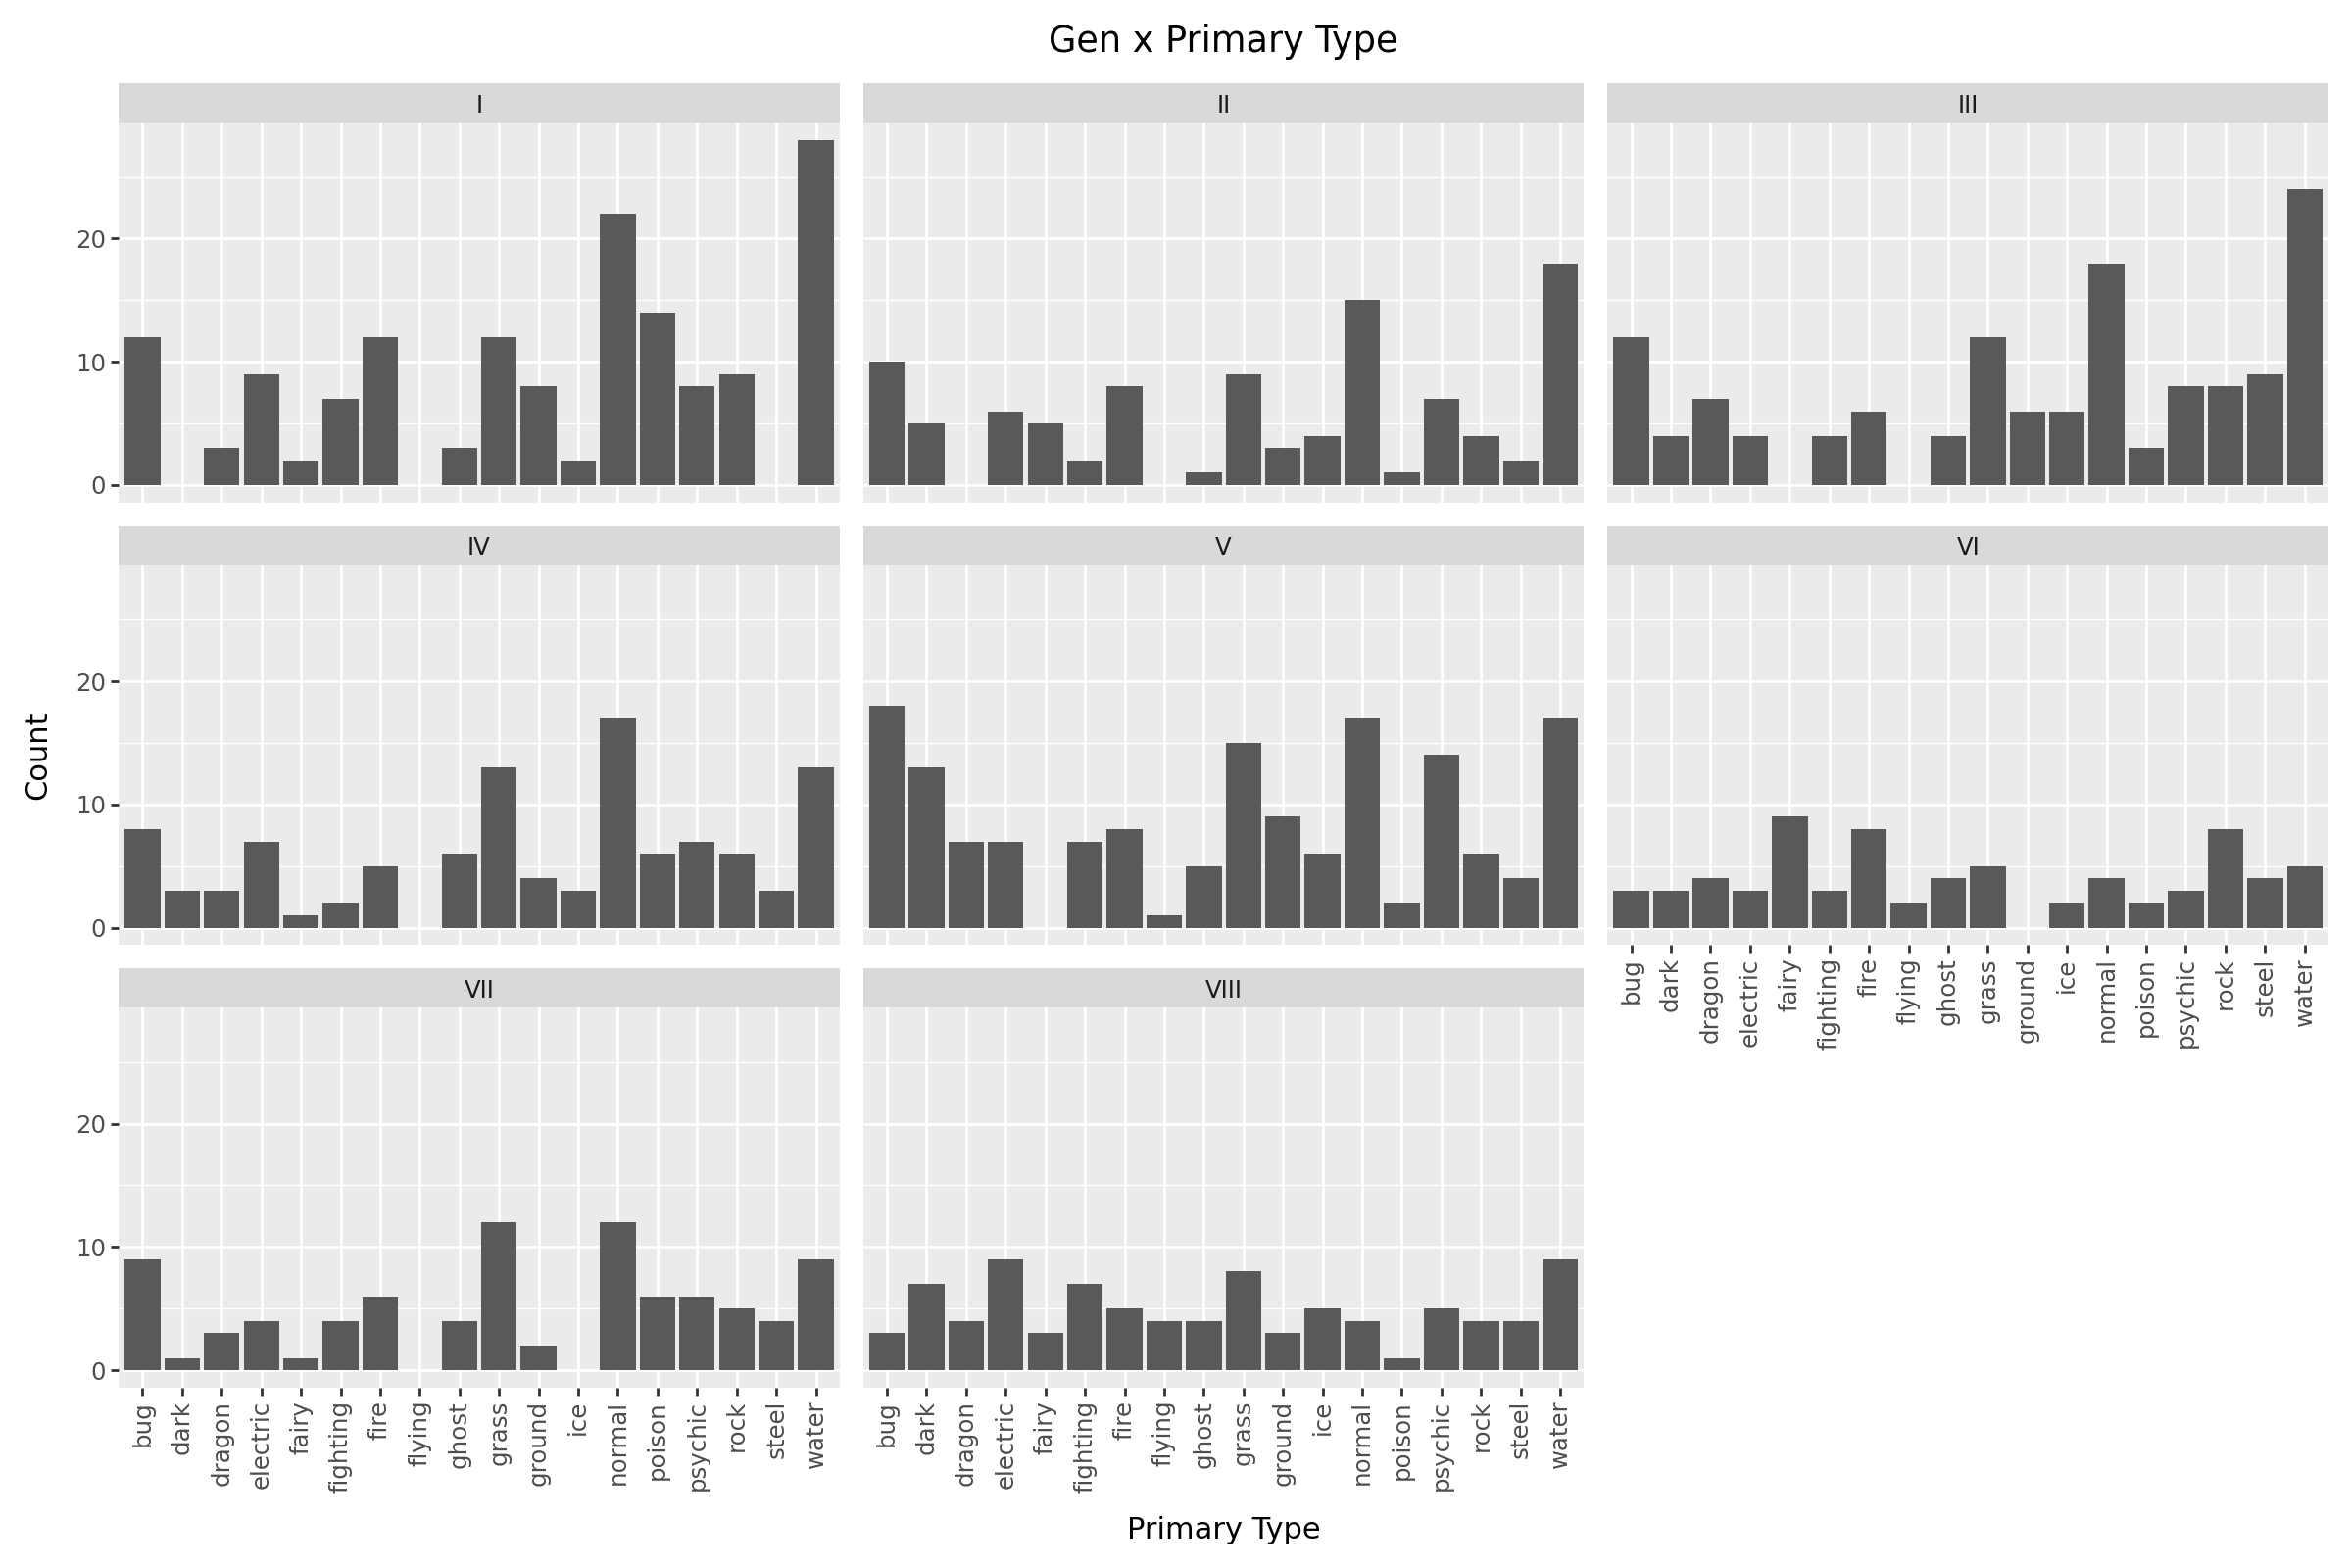

In [66]:
(
    ggplot(pokemon, aes(x="primary_type"))
    + geom_bar()
    + facet_wrap("gen", ncol=3)
    + labs(
        title="Gen x Primary Type",
        x="Primary Type",
        y="Count"
    )
    + theme(axis_text_x = element_text(angle = 90),figure_size=(12, 8))

)

